In [13]:
import warnings
warnings.filterwarnings('ignore')
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

from collections import defaultdict

# import sys
# print(sys.executable)
# print(sys.version)
# print(sys.version_info)

a4_dims = (11.7, 8.27)

import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep

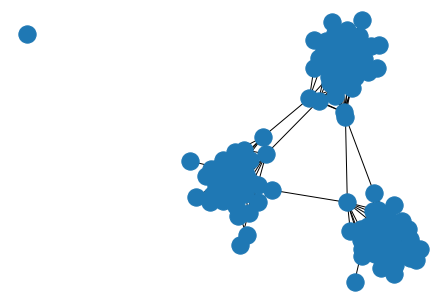

In [14]:
G = nx.planted_partition_graph(3, 50, 0.1, 0.001)
pos = nx.spring_layout(G)
nx.draw(G)

100%|██████████| 50/50 [00:00<00:00, 1701.43it/s]

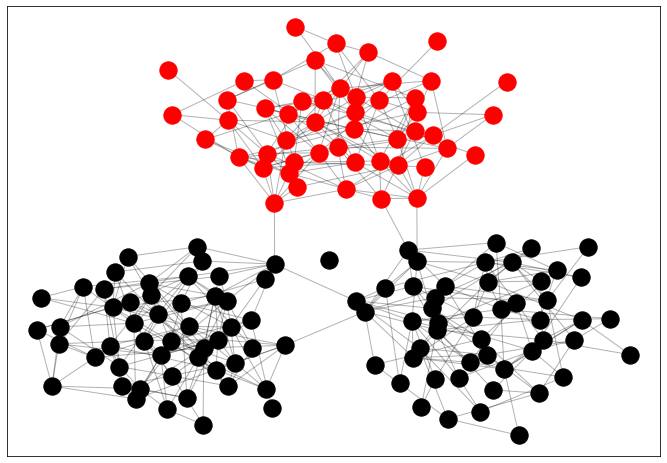

In [47]:
model = ep.ThresholdModel(G)
config = mc.Configuration()
print(config)

threshold = 0.2
infected_initial = [0]
for i in G.nodes():
    config.add_node_configuration("threshold", i, threshold)

config.add_model_initial_configuration("Infected", infected_initial)
model.set_initial_status(config)

infected = defaultdict(lambda: False)

iterations = model.iteration_bunch(50)

for j in range(50):
    for node in iterations[j]['status'].keys():
        if iterations[j]['status'][node]==1:
            infected[node]=True
        
fig, ax = plt.subplots(figsize = a4_dims)

pos = nx.kamada_kawai_layout(G,pos=pos)

nx.draw_networkx_nodes(G, ax=ax, nodelist = [nd for nd in G.nodes() if infected[nd]], 
                       pos=pos, node_color='red')
nx.draw_networkx_nodes(G, ax=ax, nodelist = [nd for nd in G.nodes() if not infected[nd]], 
                       pos=pos, node_color='black')
nx.draw_networkx_edges(G, ax=ax, pos=pos, alpha = 0.3)